# IOI complexity and event density

## Import dependencies, set constants etc.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from src import utils
from src.features.features_utils import IOIComplexity
from src.visualise.complexity_plots import *

C:\Python Projects\jazz-corpus-analysis\venv\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Load in data

In [2]:
onsets = utils.unserialise_object(fr'{utils.get_project_root()}\models\matched_onsets_corpus_chronology.p')

In [3]:
fracs = [1, 1/2, 5/12, 3/8, 1/3, 1/4, 1/6, 1/8, 1/12, 0]
fracs_s = [r'>$\frac{1}{2}$', r'$\frac{1}{2}$', r'$\frac{5}{12}$', r'$\frac{3}{8}$', r'$\frac{1}{3}$', r'$\frac{1}{4}$', r'$\frac{1}{6}$', r'$\frac{1}{8}$', r'$\frac{1}{12}$', r'<$\frac{1}{12}$']
assert sorted(fracs, reverse=True) == fracs

In [4]:
res = []
for instr in utils.INSTRUMENTS_TO_PERFORMER_ROLES.keys():
    for track in onsets:
        tempo = 60 / track.tempo
        iois = pd.Series(track.ons[instr]).diff().dropna().to_list()
        for ioi in iois:
            prop_ioi = ioi / tempo
            if prop_ioi > 4:
                continue
            prop_ioi /= 4
            bin_ = min(fracs, key=lambda x: abs(x - prop_ioi))
            res.append(dict(instr=instr, ioi=ioi, prop_ioi=prop_ioi, bin=bin_))
rhythm = pd.DataFrame(res)

In [5]:
rhythm = (
    rhythm.set_index('instr')
    .loc[utils.INSTRUMENTS_TO_PERFORMER_ROLES.keys()]
    .reset_index(drop=False)
)

## Histogram plot of proportional IOI durations and bins

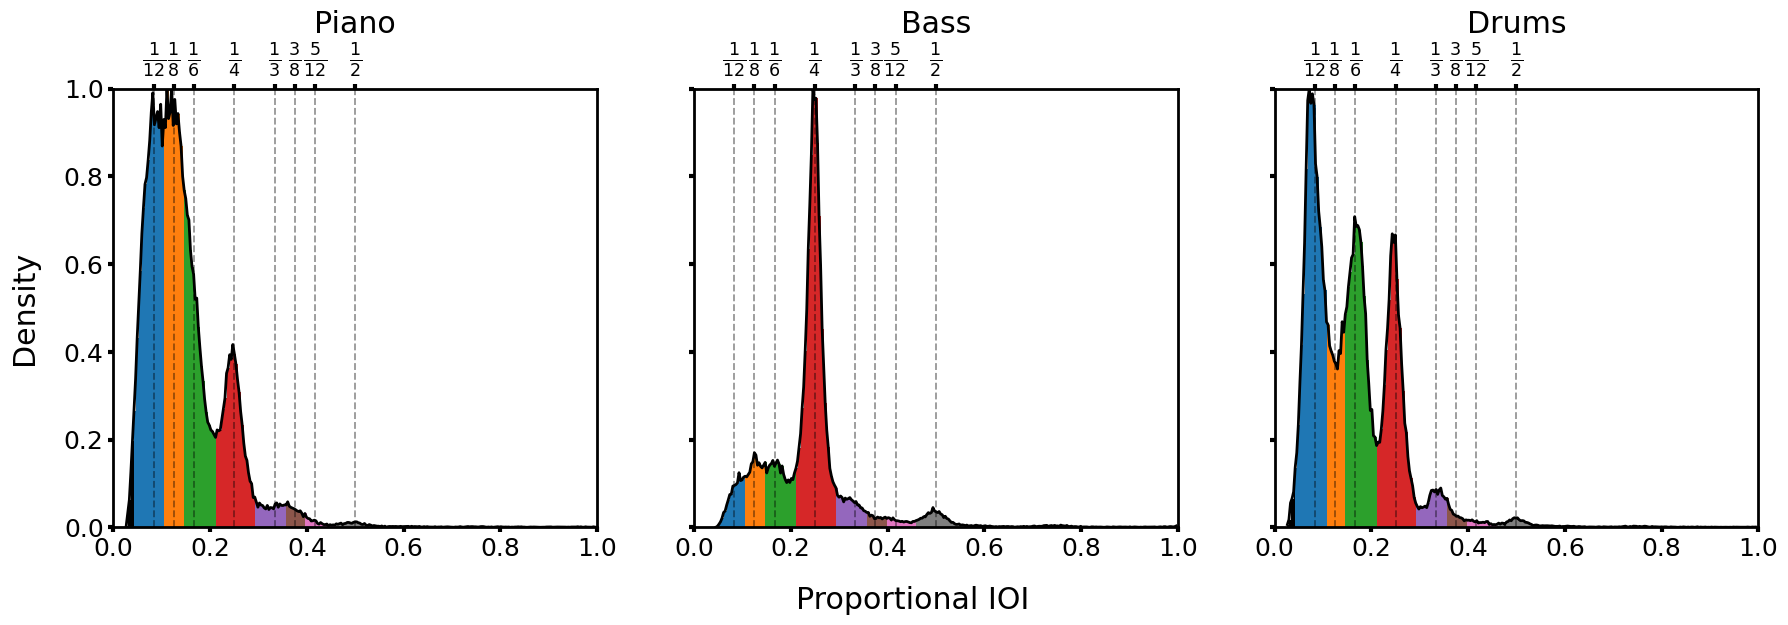

In [149]:
HistPlotBins(rhythm).create_plot()
plt.show()

## Define our extractor class for calculating IOI complexity (to be added to `src.features.features_utils`

In [35]:
cdfs = []
for t in onsets:
    downbeats = t.ons['downbeats_manual']
    tempo = t.tempo
    time_signature = t.item['time_signature']
    for instr in utils.INSTRUMENTS_TO_PERFORMER_ROLES.keys():
        my_onsets = t.ons[instr]
        cdf = IOIComplexity(
            my_onsets=my_onsets,
            downbeats=downbeats,
            tempo=tempo,
            time_signature=time_signature
        ).complexity_df.mean().to_dict()
        cdf['mbz_id'] = t.item['mbz_id']
        cdf['instr'] = instr
        cdf['tempo'] = t.tempo
        cdfs.append(cdf)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4


## Get the correlation of onset density and complexity

In [21]:
average = pd.DataFrame(cdfs).drop(columns=['bar_range'])
average['n_onsets'] = average['n_onsets'].astype(float)
average.head()

,lz77,n_onsets,mbz_id,instr,tempo
0,10.988235,21.435294,279743d1-86c9-40a8-9009-4b32d9111d1d,piano,286.077539
1,4.962025,10.151899,279743d1-86c9-40a8-9009-4b32d9111d1d,bass,286.077539
2,11.411765,24.117647,279743d1-86c9-40a8-9009-4b32d9111d1d,drums,286.077539
3,10.336066,21.090164,d71239a5-49bf-41f9-a2b8-b4da445d3d90,piano,300.339499
4,4.052632,7.347368,d71239a5-49bf-41f9-a2b8-b4da445d3d90,bass,300.339499


In [26]:
average.corr() ** 2

C:\Users\huwch\AppData\Local\Temp\ipykernel_16056\3407277934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  average.corr() ** 2


,lz77,n_onsets,tempo
lz77,1.000000,0.799971,0.047808
n_onsets,0.799971,1.000000,0.120301
tempo,0.047808,0.120301,1.000000


In [22]:
stats.pearsonr(average['lz77'], average['n_onsets'])


KeyboardInterrupt



In [42]:
average.shape

(95402, 5)

## Bootstrap mean complexity/density

In [41]:
average.groupby('instr').mean(numeric_only=True)

C:\Users\huwch\AppData\Local\Temp\ipykernel_16056\1293963152.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average.groupby('instr').mean()


,lz77,n_onsets,tempo
instr,,,
bass,6.413769,12.795569,197.379633
drums,10.059352,24.113421,197.379633
piano,10.708304,24.610311,197.379633


In [43]:
for idx, grp in average.groupby('instr'):
    for var in ['n_onsets', 'lz77']:
        true_mean = grp[var].mean()
        boots = [grp[var].sample(frac=1, replace=True, random_state=i).mean() for i in range(100)]
        low, high = np.percentile(boots, 2.5,), np.percentile(boots, 97.5)
        print(idx, var, low, true_mean, high)

bass n_onsets 12.319200190060412 12.795568651202748 13.476228722024933
bass lz77 6.195296021634048 6.4137689957621165 6.744607170137949
drums n_onsets 23.50221234004969 24.113420538078813 24.705273419466078
drums lz77 9.912126720307878 10.059352491323926 10.199071727236435
piano n_onsets 23.736967903576485 24.610311483939256 25.69534292377678
piano lz77 10.539062038625607 10.708304075130213 10.932478821914266


## Plot

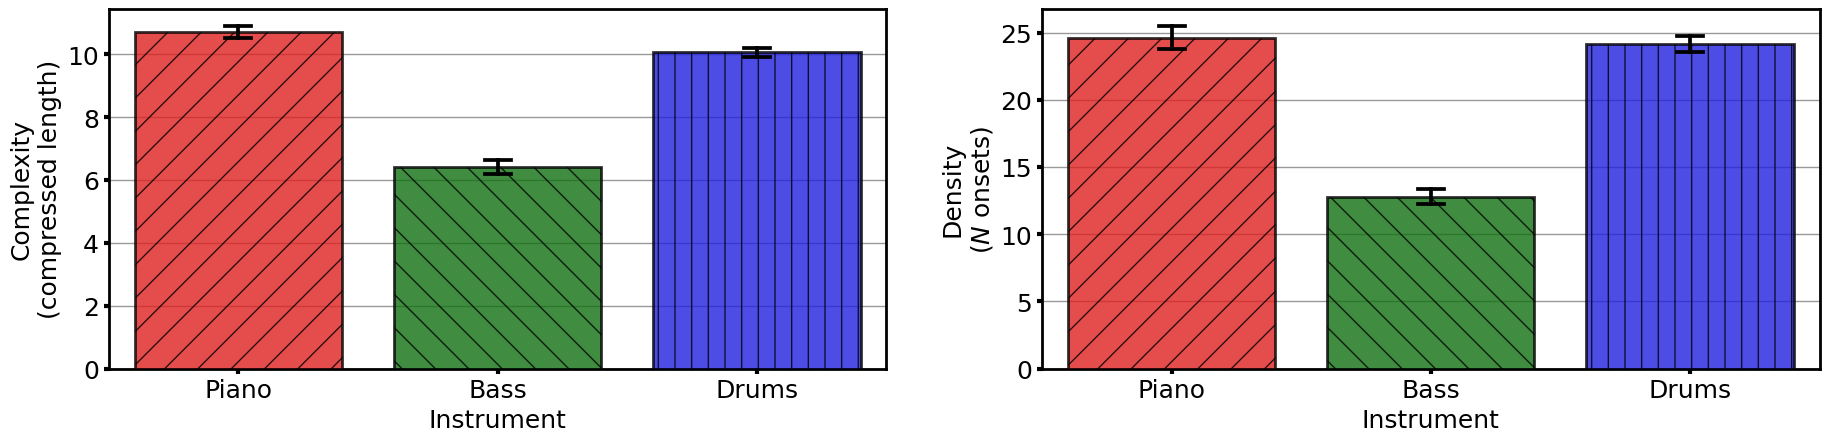

In [80]:
BarPlotComplexityDensity(average).create_plot()

<Axes: xlabel='tempo', ylabel='lz77'>

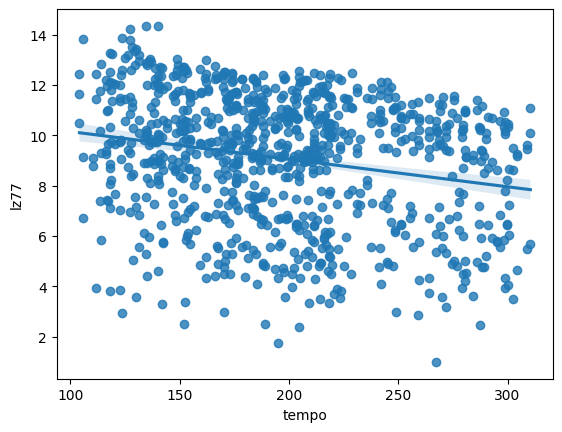

In [25]:
sns.regplot(average, x='tempo', y='lz77')

In [39]:
stats.pearsonr(average.dropna()['tempo'], average.dropna()['n_onsets'])

PearsonRResult(statistic=-0.3468446563660263, pvalue=1.4732305190800017e-26)

In [38]:
average.dropna().shape

(890, 5)